In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Modelowanie zużycia energii elektrycznej na 1 mieszkańca w kWH w zależności od wybranych czynników

##### Wczytanie danych

In [2]:
energy_cons_df = pd.read_excel('./data/dane_zuzycie_energii.xlsx', sheet_name='Sheet1')
energy_cons_df.index = pd.RangeIndex(start=1, stop=43, step=1)
energy_cons_df.index.name = 'Observation No.'
energy_cons_df

,Powiat,Y - zużycie energii elektrycznej na 1 mieszkańca [kWh],X1 - przeciętna liczba osób na 1 mieszkanie [os],X2 - ludność na 1 km2 [os/km2],X3 - mieszkania oddane do użytkowania na 1000 ludności [-],X4 - przeciętne miesięczne wynagrodzenie brutto [zł],X5 - stopa bezrobocia rejestrowanego [%],X6 - ludność w wieku 15-34 [os],X7 - liczba mieszkań [-],X8 - powierzchnia użytkowa mieszkań [m2],X9 - wskaźnik urbanizacji [%]
Observation No.,,,,,,,,,,,
1,Powiat białobrzeski,707.6,2.72,52.5,3.0,3461.85,10.1,9725,11833,973610,23.6
2,Powiat ciechanowski,708.5,2.50,85.2,1.9,3840.19,13.1,24902,31131,2357060,52.6
3,Powiat garwoliński,721.6,2.82,84.7,4.0,3776.65,11.3,31822,34836,3231888,28.3
4,Powiat gostyniński,694.0,2.58,74.3,2.4,3394.93,18.5,12186,16198,1140062,41.0
5,Powiat grodziski,1077.8,2.46,249.7,7.9,4352.30,4.4,22364,35319,3560595,55.4
6,Powiat grójecki,968.2,2.49,77.7,5.0,4133.21,3.3,25605,36565,3239850,35.1
7,Powiat kozienicki,729.4,2.54,66.6,2.3,4930.22,12.8,16801,22088,1884398,29.0
8,Powiat legionowski,979.4,2.38,292.8,8.5,3975.24,10.9,27406,44131,4513662,51.1
9,Powiat lipski,633.6,2.52,47.1,2.2,3567.68,12.6,9296,13264,1091815,16.3


In [3]:
energy_cons_df = energy_cons_df.drop(columns='Powiat')

In [4]:
print(energy_cons_df.columns)

Index(['Y - zużycie energii elektrycznej na 1 mieszkańca [kWh]',
       'X1 - przeciętna liczba osób na 1 mieszkanie [os]',
       'X2 - ludność na 1 km2 [os/km2]',
       'X3 - mieszkania oddane do użytkowania na 1000 ludności [-]',
       'X4 - przeciętne miesięczne wynagrodzenie brutto [zł]',
       'X5 - stopa bezrobocia rejestrowanego [%]',
       'X6 - ludność w wieku 15-34 [os]', 'X7 - liczba mieszkań [-]',
       'X8 - powierzchnia użytkowa mieszkań [m2]',
       'X9 - wskaźnik urbanizacji [%]'],
      dtype='object')


### Rozdzielenie nazw zmiennych i ich opisów

In [5]:
vars = [colname.split(" - ", 1)[0] for colname in energy_cons_df.columns]
vars_description = [colname.split(" - ", 1)[1] for colname in energy_cons_df.columns]
vars_descr_dict = dict( zip(vars, vars_description) )
vars, vars_description

(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'],
 ['zużycie energii elektrycznej na 1 mieszkańca [kWh]',
  'przeciętna liczba osób na 1 mieszkanie [os]',
  'ludność na 1 km2 [os/km2]',
  'mieszkania oddane do użytkowania na 1000 ludności [-]',
  'przeciętne miesięczne wynagrodzenie brutto [zł]',
  'stopa bezrobocia rejestrowanego [%]',
  'ludność w wieku 15-34 [os]',
  'liczba mieszkań [-]',
  'powierzchnia użytkowa mieszkań [m2]',
  'wskaźnik urbanizacji [%]'])

In [6]:
energy_cons_df.columns = vars
energy_cons_df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
Observation No.,,,,,,,,,,
1,707.6,2.72,52.5,3.0,3461.85,10.1,9725,11833,973610,23.6
2,708.5,2.50,85.2,1.9,3840.19,13.1,24902,31131,2357060,52.6
3,721.6,2.82,84.7,4.0,3776.65,11.3,31822,34836,3231888,28.3
4,694.0,2.58,74.3,2.4,3394.93,18.5,12186,16198,1140062,41.0
5,1077.8,2.46,249.7,7.9,4352.30,4.4,22364,35319,3560595,55.4


In [7]:
energy_cons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 1 to 42
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       42 non-null     float64
 1   X1      42 non-null     float64
 2   X2      42 non-null     float64
 3   X3      42 non-null     float64
 4   X4      42 non-null     float64
 5   X5      42 non-null     float64
 6   X6      42 non-null     int64  
 7   X7      42 non-null     int64  
 8   X8      42 non-null     int64  
 9   X9      42 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 3.4 KB


In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_describe = energy_cons_df.describe()
df_describe.loc['var_coeff'] = df_describe.loc['std'] / df_describe.loc['mean']
df_describe.loc['kurtosis'] = df_describe.kurtosis()
df_describe.loc['skew'] = df_describe.skew() 
df_describe

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,800.73,2.57,362.28,4.01,3862.31,11.59,32798.07,53044.74,4699629.19,42.86
std,160.63,0.30,728.38,2.32,607.65,5.71,61060.17,140253.65,12551317.68,26.06
min,544.20,1.73,40.80,1.60,3232.13,2.60,8854.00,11507.00,967572.00,2.20
25%,697.40,2.42,56.12,2.40,3405.54,7.55,14750.25,17156.25,1299886.50,27.85
50%,775.85,2.54,81.05,3.10,3592.45,11.25,21244.50,27758.00,2360818.50,37.00
75%,871.30,2.74,210.38,4.58,4106.32,14.88,29330.00,42112.00,3490273.25,52.23
max,1303.00,3.37,3391.00,11.50,5739.61,28.50,411201.00,932574.00,83165992.00,100.00
var_coeff,0.20,0.12,2.01,0.58,0.16,0.49,1.86,2.64,2.67,0.61
kurtosis,-0.73,8.83,7.84,7.52,-1.14,1.53,8.46,8.47,8.47,2.15


#### Histogramy dla zmiennych

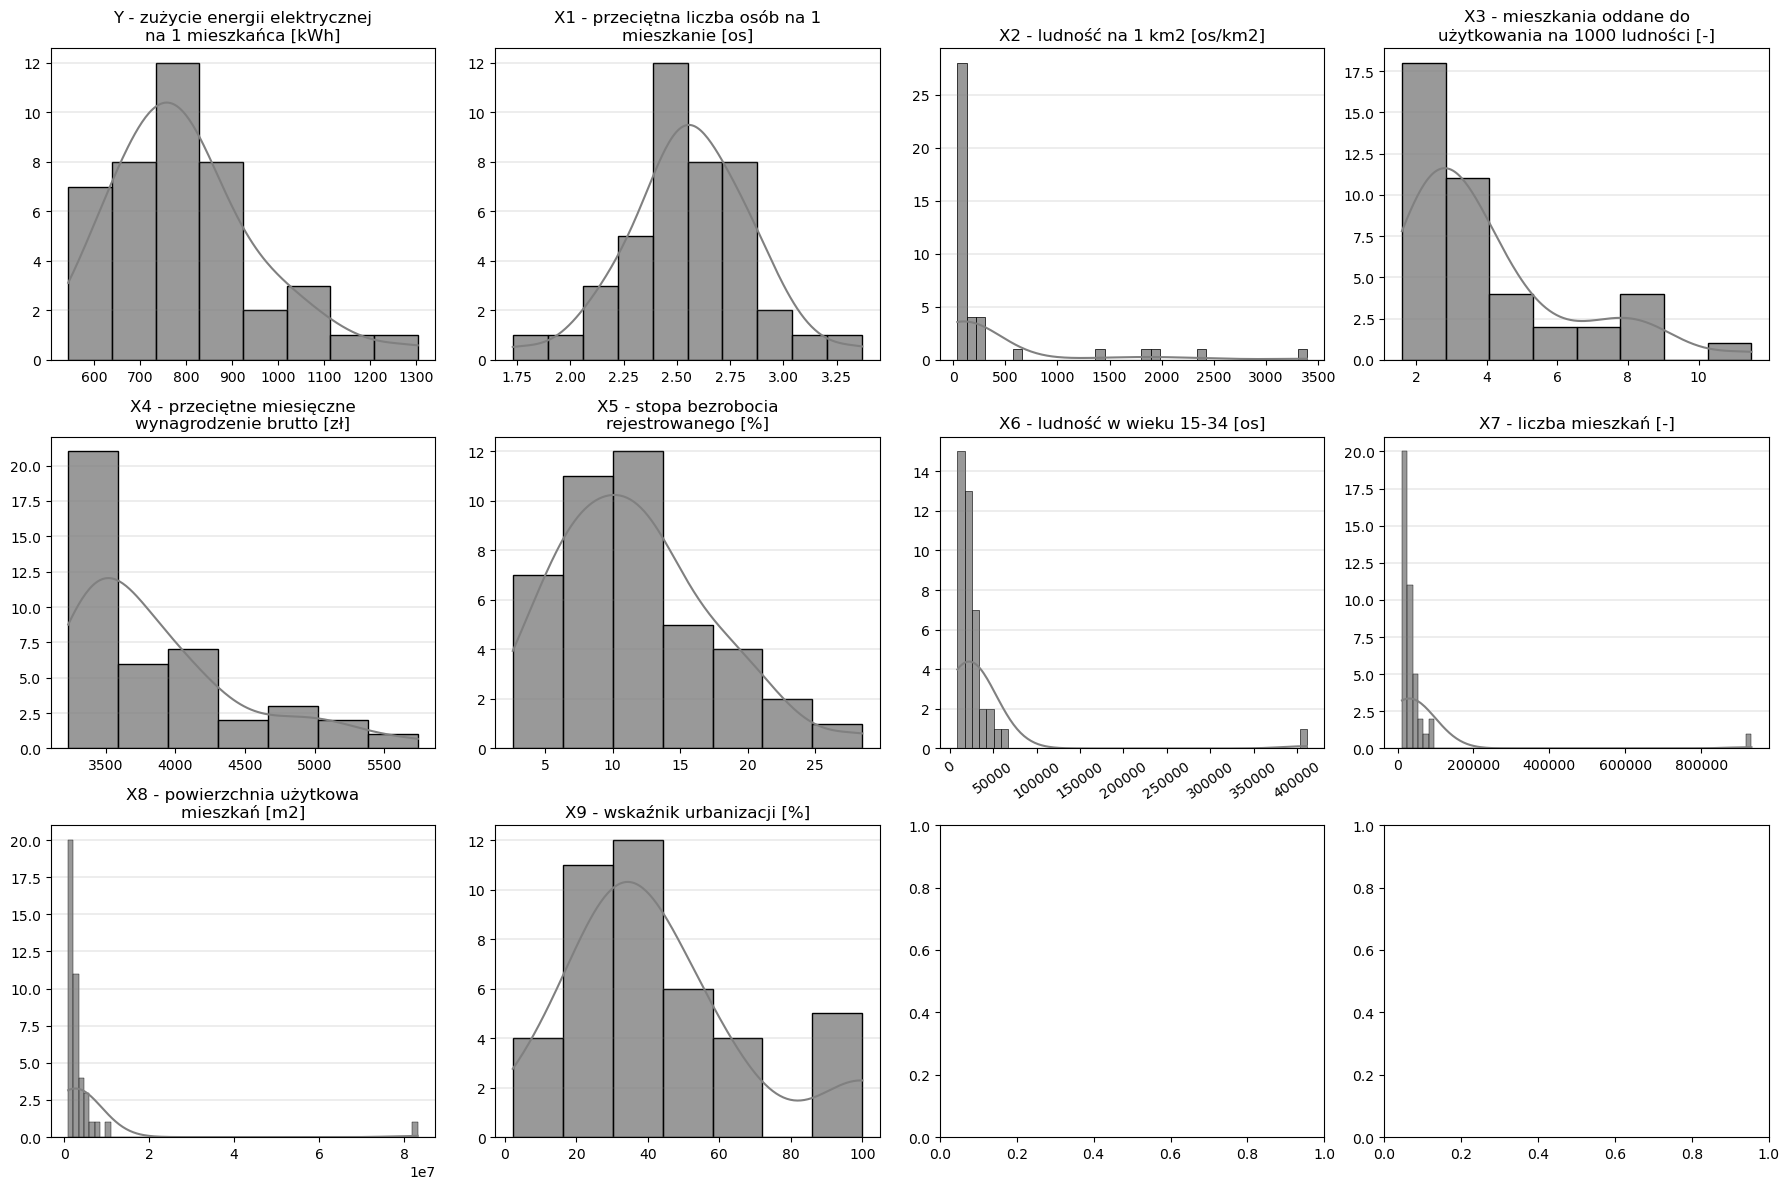

In [9]:
import textwrap

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()
for ax, var_descr in zip(axes, vars_descr_dict.items()):
    sns.histplot(energy_cons_df[var_descr[0]], ax=ax, edgecolor='black', alpha=0.8, color='gray', kde=True)
    title = f"{var_descr[0]} - {var_descr[1]}"
    ax.set_title( "\n".join(textwrap.wrap(title, width=32)) )
    ax.set_xlabel('')
    ax.set_ylabel('')
    if var_descr[0] == 'X6':
        ax.tick_params(rotation=35, axis='x')
    ax.grid(linewidth=0.2, axis='y', color='gray')
plt.tight_layout()
plt.show()

#### Boxploty dla zmiennych

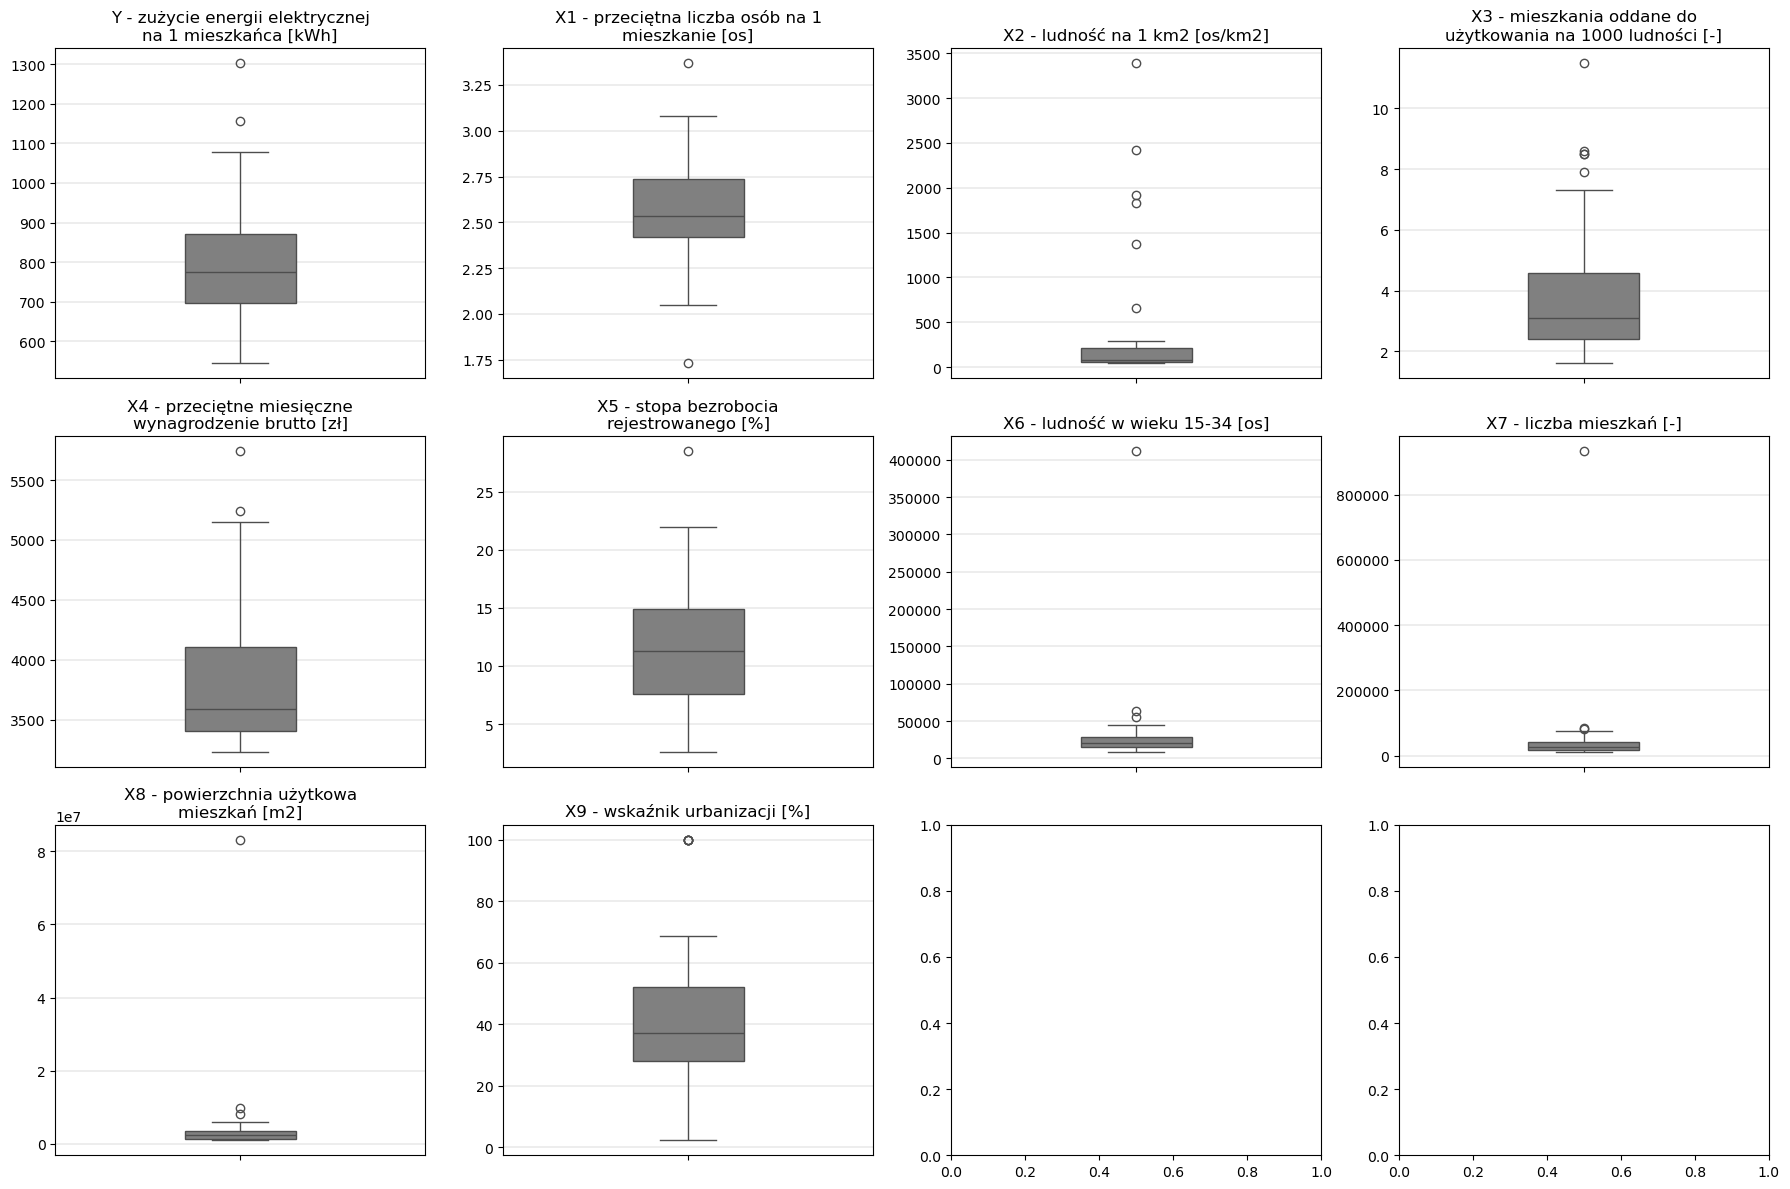

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()
for ax, var_descr in zip(axes, vars_descr_dict.items()):
    boxplot = sns.boxplot(data=energy_cons_df[var_descr[0]], ax=ax, width=0.3, color='gray')
    title = f"{var_descr[0]} - {var_descr[1]}"
    ax.set_title( "\n".join(textwrap.wrap(title, width=32)) )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(linewidth=0.2, axis='y', color='gray')
plt.tight_layout()
plt.show()

#### Wykresy korelacji między zmiennymi

<Figure size 1200x1000 with 0 Axes>

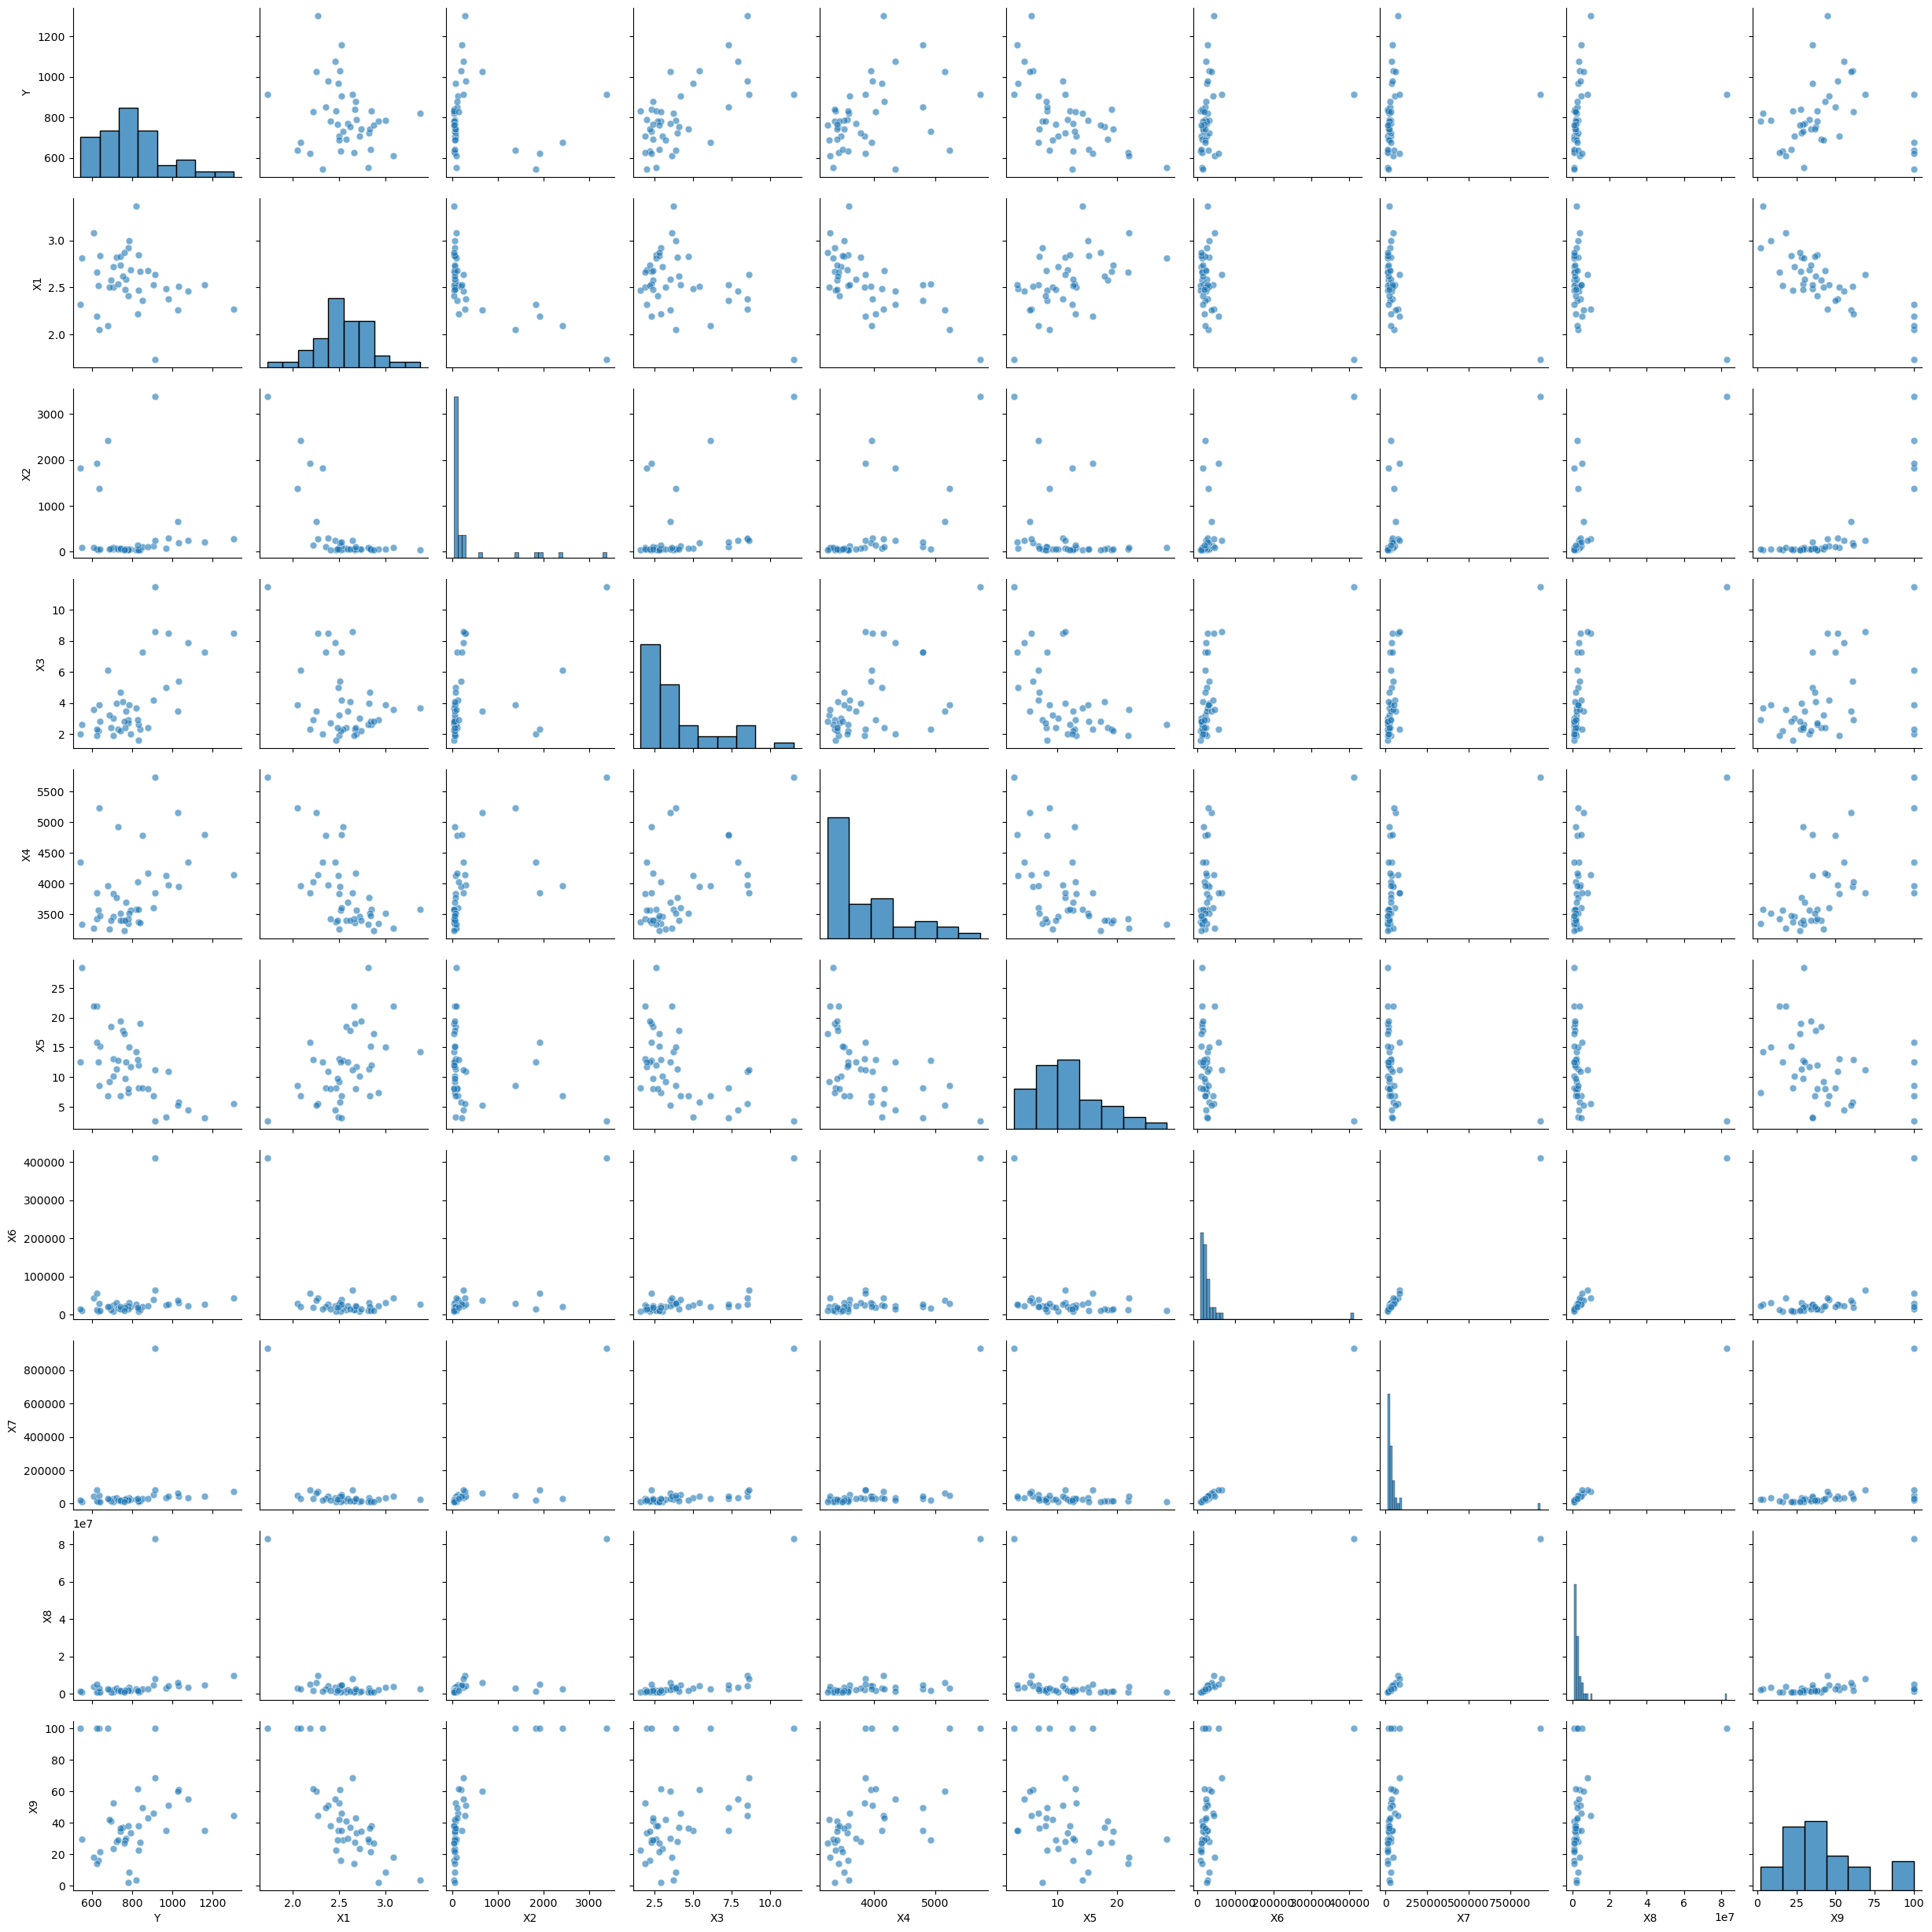

In [11]:
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(data=energy_cons_df,
                        plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'white'},
                        height=2.5)
pairplot.tight_layout()
plt.show()

#### Macierz korelacji

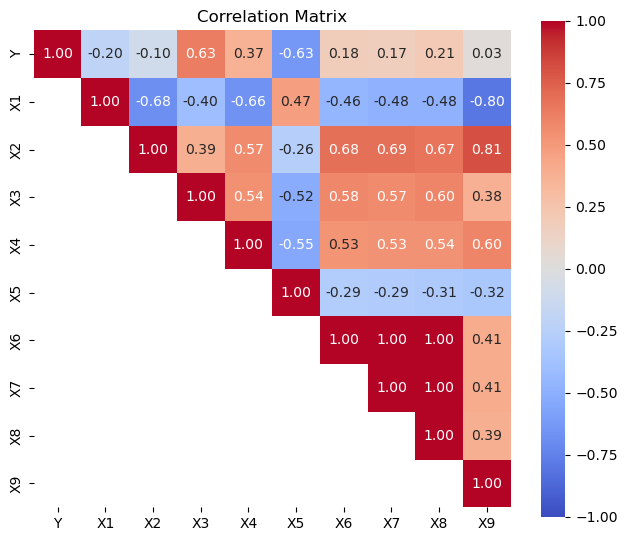

In [12]:
corr_mat = energy_cons_df.corr()
mask = np.tril( np.ones_like(corr_mat, dtype=bool), k=-1 )
plt.figure(figsize=(6.5, 6.5))
ax = plt.subplot(1, 1, 1)
sns.heatmap(corr_mat, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, vmax=1,
            square=True, 
            mask=mask,
            cbar_kws={"shrink": .8}, 
            ax=ax)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [13]:
import statsmodels.api as sm

X = sm.add_constant( energy_cons_df.drop(columns='Y') )
y = energy_cons_df['Y']

X.head(), y.head()

(                 const   X1     X2   X3      X4    X5     X6     X7       X8  \
 Observation No.                                                                
 1                 1.00 2.72  52.50 3.00 3461.85 10.10   9725  11833   973610   
 2                 1.00 2.50  85.20 1.90 3840.19 13.10  24902  31131  2357060   
 3                 1.00 2.82  84.70 4.00 3776.65 11.30  31822  34836  3231888   
 4                 1.00 2.58  74.30 2.40 3394.93 18.50  12186  16198  1140062   
 5                 1.00 2.46 249.70 7.90 4352.30  4.40  22364  35319  3560595   
 
                    X9  
 Observation No.        
 1               23.60  
 2               52.60  
 3               28.30  
 4               41.00  
 5               55.40  ,
 Observation No.
 1    707.60
 2    708.50
 3    721.60
 4    694.00
 5   1077.80
 Name: Y, dtype: float64)

In [14]:
ols_regressor = sm.OLS(endog=y, exog=X).fit()
print( ols_regressor.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.48e-08
Time:                        19:47:50   Log-Likelihood:                -239.64
No. Observations:                  42   AIC:                             499.3
Df Residuals:                      32   BIC:                             516.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        822.6897    317.423      2.592      0.0

$$
Macierz \, H: \; H = X\left( X^{T}X \right)^{-1}X^{T}
$$

In [15]:
X_array = np.array(X)
"""@ operator mnożenia macierzowego"""
H = X_array @ np.linalg.inv(X_array.T @ X_array) @ X_array.T
np.set_printoptions(threshold=np.inf)
H, H.shape

(array([[ 9.27439821e-02, -9.18473700e-03,  5.85615613e-03,
          2.99028548e-02,  5.13082263e-02,  4.97845946e-02,
         -1.35560854e-02,  1.45503695e-02,  6.00630283e-02,
          7.84749038e-02,  2.89817243e-02,  5.47833079e-03,
          4.11464846e-02,  1.57600911e-03,  6.07761041e-02,
          3.82873303e-02,  3.97051565e-02, -3.49657297e-02,
          2.12974637e-02,  1.91620279e-02, -4.20487169e-02,
          6.44246623e-02,  1.77165787e-02,  2.94929568e-02,
         -5.26258628e-02,  8.31814091e-02,  2.38346488e-02,
          3.04684086e-02,  5.95583210e-02,  1.07558601e-03,
          3.24039963e-02,  4.78260917e-02, -8.95632910e-02,
          8.11468717e-02,  7.48240884e-02,  6.67509768e-02,
         -3.13931054e-04,  1.63032740e-02, -2.21426876e-02,
         -5.79496009e-02,  5.04982711e-02,  3.74975447e-03],
        [-9.18473700e-03,  1.40400113e-01,  2.57823128e-02,
          6.28290881e-02, -3.53512900e-02, -1.28006202e-03,
          4.73235804e-02, -6.31261341e-

In [16]:
ols_regressor.resid.values, H.diagonal()

(array([ -69.6154896 ,  -60.23423305, -102.16527462,    1.43871636,
          73.21598531,   44.02929622,  -74.11560928,   30.47818555,
        -109.48892476,   44.08385072,  150.73593701,   21.99084488,
        -127.73120791,  -90.65955986,   72.50442374,   28.03239037,
         111.45324726,   26.29162051,   37.31350854,    4.90243732,
          73.77413182,   52.03835049,   -4.70746278,   16.88761493,
         -44.32169908,   -0.80175724,   63.51860264,   26.06549355,
         -44.58070886,  -32.7576973 ,  103.58543937,  -16.8957264 ,
        -108.43398779,  -97.35385287,  -74.82383787,   52.94069814,
          68.41989947, -100.70561243,  -65.97513054,  167.43667253,
         -33.23274552,  -12.5368288 ]),
 array([0.09274398, 0.14040011, 0.08142814, 0.1093907 , 0.21175692,
        0.12497893, 0.31064578, 0.25304049, 0.1484783 , 0.17962705,
        0.08704083, 0.14582172, 0.12321243, 0.27264805, 0.35166503,
        0.06765339, 0.15623662, 0.68939879, 0.15363761, 0.0648815 ,
        

##### Identyfikacja obserwacji nietypowych

In [17]:
table = pd.DataFrame(data={ 'ei': ols_regressor.resid.values,
                            'hi': H.diagonal() },
                     index=np.arange( 1, len(H.diagonal()) + 1 ))
k = 8
n = len(energy_cons_df)
h_crit = 2 * (k + 1) / n
print(f'h_crit = {h_crit:.4f}')
table['h_crit'] = h_crit
table['ei * hi / (1 - hi)'] = table['ei'] * table['hi'] / (1 - table['hi'])

table['si'] = 0.0
for i in energy_cons_df.index:
    table.loc[i, 'si'] = table.loc[table.index != i, 'ei'].std()
table['ri'] = table['ei'] / (table['si'] * np.sqrt(1 - table['hi']))
table['DFFITS'] = table['ri'] * np.sqrt( table['hi'] / (1 - table['hi']) )
dffits_crit = 2 * np.sqrt((k + 1) / (n - k - 1))
table['DFFITS_crit'] = dffits_crit
table['is_leverage'] = np.where( table['hi'] >= h_crit, '* Yes *', 'No' )
table['is_influence'] = np.where( abs(table['DFFITS']) > dffits_crit, '* Yes *', 'No' )
table['is_unusual'] = np.where( table['ri'] > 2, '* Yes *', 'No' )

table

h_crit = 0.4286


,ei,hi,h_crit,ei * hi / (1 - hi),si,ri,DFFITS,DFFITS_crit,is_leverage,is_influence,is_unusual
1,-69.62,0.09,0.43,-7.12,73.69,-0.99,-0.32,1.04,No,No,No
2,-60.23,0.14,0.43,-9.84,73.91,-0.88,-0.36,1.04,No,No,No
3,-102.17,0.08,0.43,-9.06,72.72,-1.47,-0.44,1.04,No,No,No
4,1.44,0.11,0.43,0.18,74.53,0.02,0.01,1.04,No,No,No
5,73.22,0.21,0.43,19.67,73.61,1.12,0.58,1.04,No,No,No
6,44.03,0.12,0.43,6.29,74.20,0.63,0.24,1.04,No,No,No
7,-74.12,0.31,0.43,-33.40,73.58,-1.21,-0.81,1.04,No,No,No
8,30.48,0.25,0.43,10.32,74.37,0.47,0.28,1.04,No,No,No
9,-109.49,0.15,0.43,-19.09,72.44,-1.64,-0.68,1.04,No,No,No
10,44.08,0.18,0.43,9.65,74.20,0.66,0.31,1.04,No,No,No


##### Dobór zmiennych metodą regresji wstecz (narazie nic nie robię z obserwacjami nietypowymi)

In [18]:
def backward_regression(X, y, significance_level=0.05):
    X_selected = X.copy()
    i = 1
    while True:
        model = sm.OLS(endog=y, exog=X_selected).fit()
        print('\n' + 10*'=' + f' MODEL {i} ' + 10*'=')
        print( model.summary() )
        p_values = model.pvalues.drop(index='const') # exclude constant
        max_pval = p_values.max()
        
        if max_pval > significance_level:
            excluded_var = p_values.idxmax()
            print(excluded_var)
            print(f"Dropping variable: {excluded_var} (p = {max_pval:.4f})")
            X_selected = X_selected.drop(columns=excluded_var)
        else:
            break
        i += 1
    
    print("\nFinal Model:")
    print( model.summary() )
    return list( X_selected.drop(columns='const').columns ), model

sel_vars_v1, model_v1 = backward_regression(X=X, y=y)


========== MODEL 1 ==========
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.48e-08
Time:                        19:47:50   Log-Likelihood:                -239.64
No. Observations:                  42   AIC:                             499.3
Df Residuals:                      32   BIC:                             516.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        822.6897

In [19]:
print(sel_vars_v1)
energy_cons_final_v1 = energy_cons_df[['Y', *sel_vars_v1]]
energy_cons_final_v1.head()

['X2', 'X5', 'X7', 'X8', 'X9']


,Y,X2,X5,X7,X8,X9
Observation No.,,,,,,
1,707.60,52.50,10.10,11833,973610,23.60
2,708.50,85.20,13.10,31131,2357060,52.60
3,721.60,84.70,11.30,34836,3231888,28.30
4,694.00,74.30,18.50,16198,1140062,41.00
5,1077.80,249.70,4.40,35319,3560595,55.40


In [20]:
print( model_v1.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     24.76
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           9.89e-11
Time:                        19:47:51   Log-Likelihood:                -241.11
No. Observations:                  42   AIC:                             494.2
Df Residuals:                      36   BIC:                             504.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        859.8472     53.079     16.200      0.0

#### Analiza czynnika inflacji wariancji do zbadania współiniowości zmiennych objaśniających
$$ VIF_i = \frac{1}{1 - {R_i}^2} \;\;\;\;\;\;\; i = 1, 2 ... k $$

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(numerical_data):    
     X = numerical_data 
     X_with_const = sm.add_constant(X)

     VIFs = pd.DataFrame(
               data=[variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])],
               index=X_with_const.columns,
               columns=['VIF']
     )
     return VIFs


VIF( energy_cons_final_v1.drop(columns='Y') )

,VIF
const,17.88
X2,5.65
X5,1.38
X7,450.50
X8,439.30
X9,3.72


In [22]:
def show_selected_vars_description(selected_vars, vars_descr_dict):
    for v in vars_descr_dict.items():
        if v[0] in selected_vars:
            print(f'{v[0]} - {v[1]}')
            
show_selected_vars_description(sel_vars_v1, vars_descr_dict)

X2 - ludność na 1 km2 [os/km2]
X5 - stopa bezrobocia rejestrowanego [%]
X7 - liczba mieszkań [-]
X8 - powierzchnia użytkowa mieszkań [m2]
X9 - wskaźnik urbanizacji [%]


##### Odrzucamy zmienną X7 ze względu na dużą współiniowość 

In [23]:
energy_cons_final_v1 = energy_cons_final_v1.drop(columns='X7')
VIF( energy_cons_final_v1.drop(columns='Y') )

,VIF
const,16.35
X2,5.40
X5,1.21
X8,2.26
X9,3.68


In [24]:
X_final1 = sm.add_constant(energy_cons_final_v1.drop(columns='Y'))
y_final1 = energy_cons_final_v1['Y']

final_model_v1 = sm.OLS(endog=y_final1, exog=X_final1).fit()
print( final_model_v1.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     12.01
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.36e-06
Time:                        19:47:51   Log-Likelihood:                -254.94
No. Observations:                  42   AIC:                             519.9
Df Residuals:                      37   BIC:                             528.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        949.6316     69.593     13.645      0.0

In [25]:
for index, val in final_model_v1.pvalues.items():
    print(f'{index} - p-value = {val:.8f}')

const - p-value = 0.00000000
X2 - p-value = 0.00244355
X5 - p-value = 0.00001153
X8 - p-value = 0.00955731
X9 - p-value = 0.12290277


In [26]:
table

,ei,hi,h_crit,ei * hi / (1 - hi),si,ri,DFFITS,DFFITS_crit,is_leverage,is_influence,is_unusual
1,-69.62,0.09,0.43,-7.12,73.69,-0.99,-0.32,1.04,No,No,No
2,-60.23,0.14,0.43,-9.84,73.91,-0.88,-0.36,1.04,No,No,No
3,-102.17,0.08,0.43,-9.06,72.72,-1.47,-0.44,1.04,No,No,No
4,1.44,0.11,0.43,0.18,74.53,0.02,0.01,1.04,No,No,No
5,73.22,0.21,0.43,19.67,73.61,1.12,0.58,1.04,No,No,No
6,44.03,0.12,0.43,6.29,74.20,0.63,0.24,1.04,No,No,No
7,-74.12,0.31,0.43,-33.40,73.58,-1.21,-0.81,1.04,No,No,No
8,30.48,0.25,0.43,10.32,74.37,0.47,0.28,1.04,No,No,No
9,-109.49,0.15,0.43,-19.09,72.44,-1.64,-0.68,1.04,No,No,No
10,44.08,0.18,0.43,9.65,74.20,0.66,0.31,1.04,No,No,No


##### Ta sama procedura dla danych po usunięciu obserwacji nietypowych

In [27]:
obs_to_drop = [40, 42]
energy_cons_cleaned_df = energy_cons_df.drop(index=obs_to_drop).reset_index()
energy_cons_cleaned_df.index = pd.RangeIndex( start=1, stop=len(energy_cons_cleaned_df)+1, step=1 ) 
energy_cons_cleaned_df

,Observation No.,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9
1,1,707.60,2.72,52.50,3.00,3461.85,10.10,9725,11833,973610,23.60
2,2,708.50,2.50,85.20,1.90,3840.19,13.10,24902,31131,2357060,52.60
3,3,721.60,2.82,84.70,4.00,3776.65,11.30,31822,34836,3231888,28.30
4,4,694.00,2.58,74.30,2.40,3394.93,18.50,12186,16198,1140062,41.00
5,5,1077.80,2.46,249.70,7.90,4352.30,4.40,22364,35319,3560595,55.40
6,6,968.20,2.49,77.70,5.00,4133.21,3.30,25605,36565,3239850,35.10
7,7,729.40,2.54,66.60,2.30,4930.22,12.80,16801,22088,1884398,29.00
8,8,979.40,2.38,292.80,8.50,3975.24,10.90,27406,44131,4513662,51.10
9,9,633.60,2.52,47.10,2.20,3567.68,12.60,9296,13264,1091815,16.30
10,10,833.00,2.47,40.80,1.60,3369.26,8.20,8854,11507,967572,22.50


In [28]:
X_v2 = sm.add_constant( energy_cons_cleaned_df.drop(columns=['Observation No.', 'Y']) )
y_v2 = energy_cons_cleaned_df['Y']

sel_vars_v2, model_v2 = backward_regression(X=X_v2, y=y_v2)


========== MODEL 1 ==========
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     21.90
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           7.47e-11
Time:                        19:47:51   Log-Likelihood:                -219.08
No. Observations:                  40   AIC:                             458.2
Df Residuals:                      30   BIC:                             475.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.3298

In [29]:
print(sel_vars_v2)
energy_cons_final_v2 = energy_cons_cleaned_df[['Y', *sel_vars_v2]]
energy_cons_final_v2.head()

['X2', 'X5', 'X6', 'X8']


,Y,X2,X5,X6,X8
1,707.60,52.50,10.10,9725,973610
2,708.50,85.20,13.10,24902,2357060
3,721.60,84.70,11.30,31822,3231888
4,694.00,74.30,18.50,12186,1140062
5,1077.80,249.70,4.40,22364,3560595


In [30]:
print( model_v2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     44.49
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.95e-13
Time:                        19:47:51   Log-Likelihood:                -223.45
No. Observations:                  40   AIC:                             456.9
Df Residuals:                      35   BIC:                             465.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        899.5839     41.167     21.852      0.0

#### Badanie współliniowości

In [31]:
VIF(energy_cons_final_v2.drop(columns='Y'))

,VIF
const,14.24
X2,1.05
X5,1.35
X6,4.93
X8,5.57


In [32]:
show_selected_vars_description(sel_vars_v2, vars_descr_dict)

X2 - ludność na 1 km2 [os/km2]
X5 - stopa bezrobocia rejestrowanego [%]
X6 - ludność w wieku 15-34 [os]
X8 - powierzchnia użytkowa mieszkań [m2]


In [33]:
X_final2 = sm.add_constant( energy_cons_final_v2.drop(columns='Y') )
y_final2 = energy_cons_final_v2['Y']

final_model_v2 = sm.OLS(endog=y_final2, exog=X_final2).fit()
print( final_model_v2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     44.49
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.95e-13
Time:                        19:47:51   Log-Likelihood:                -223.45
No. Observations:                  40   AIC:                             456.9
Df Residuals:                      35   BIC:                             465.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        899.5839     41.167     21.852      0.0

#### Badanie istotności parametrów
$$ H_0: {\beta_i = 0} \\
   H_1: {\beta_i \neq 0} $$

In [34]:
for index, val in final_model_v2.pvalues.items():
    print(f'{index} - p-value = {val:.8f}')

const - p-value = 0.00000000
X2 - p-value = 0.00007341
X5 - p-value = 0.00006399
X6 - p-value = 0.00003512
X8 - p-value = 0.00000001


$$ \text{Dla wszystkich zmiennych p-value < 0.05 więc odrzucamy } H_0 \text{ na rzecz } H_1 $$

#### Badanie losowości reszt
$$ E(\epsilon)=0 $$

In [35]:
final_model_v2.resid.values.mean()

4.127969077671878e-11

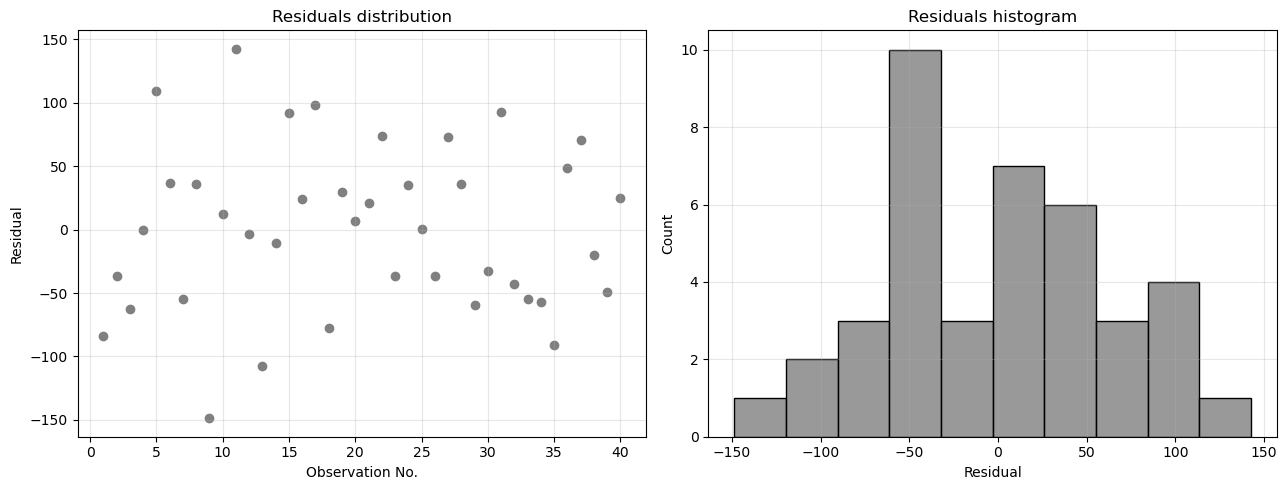

In [36]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=energy_cons_final_v2.index,
            y=final_model_v2.resid,
            color='gray')
plt.xlabel('Observation No.')
plt.ylabel('Residual')
plt.title('Residuals distribution')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(data=final_model_v2.resid, 
             edgecolor='black', 
             alpha=0.8, 
             color='gray',
             bins=10)
plt.xlabel('Residual')
plt.title('Residuals histogram')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### Badanie normalności
$$ H_0: \text{Składnik losowy modelu ma rozkład normalny} \\[6pt]
   H_1: \text{Składnik losowy modelu nie ma rozkładu normalnego} $$

In [37]:
from scipy.stats import shapiro

stat, p_value = shapiro(final_model_v2.resid)
print(f'Shapiro-Wilk statistic: {stat:.4f},  p-value: {p_value:.4f}')

Shapiro-Wilk statistic: 0.9886,  p-value: 0.9535


$$ \text{p-value > 0.05 więc brak podstaw do odrzucenia } H_0 $$